In [1]:
!kaggle datasets download -d fedesoriano/traffic-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/traffic-prediction-dataset
License(s): copyright-authors
  0% 0.00/277k [00:00<?, ?B/s]
100% 277k/277k [00:00<00:00, 66.5MB/s]


In [2]:
!unzip traffic-prediction-dataset.zip

Archive:  traffic-prediction-dataset.zip
  inflating: traffic.csv             


In [3]:
import pandas as pd

In [77]:
df=pd.read_csv('/content/traffic.csv')

In [78]:
df.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [80]:
import datetime as dt

In [81]:
df['DateTime']=pd.to_datetime(df['DateTime'])

In [82]:
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Date_no'] = df['DateTime'].dt.day
df['Hour'] = df['DateTime'].dt.hour
df['Day'] = df.DateTime.dt.strftime("%A")

In [83]:
df.set_index(['DateTime'],inplace=True)

In [84]:
import matplotlib.pyplot as plt

In [85]:
df.drop(['ID'],axis=1,inplace=True) #Execute Once

In [86]:
df.head()

,Junction,Vehicles,Year,Month,Date_no,Hour,Day
DateTime,,,,,,,
2015-11-01 00:00:00,1,15,2015,11,1,0,Sunday
2015-11-01 01:00:00,1,13,2015,11,1,1,Sunday
2015-11-01 02:00:00,1,10,2015,11,1,2,Sunday
2015-11-01 03:00:00,1,7,2015,11,1,3,Sunday
2015-11-01 04:00:00,1,9,2015,11,1,4,Sunday


In [87]:
df['Day'].unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

In [88]:
df['Day']=df['Day'].map({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})

In [89]:
import seaborn as sns

In [90]:
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

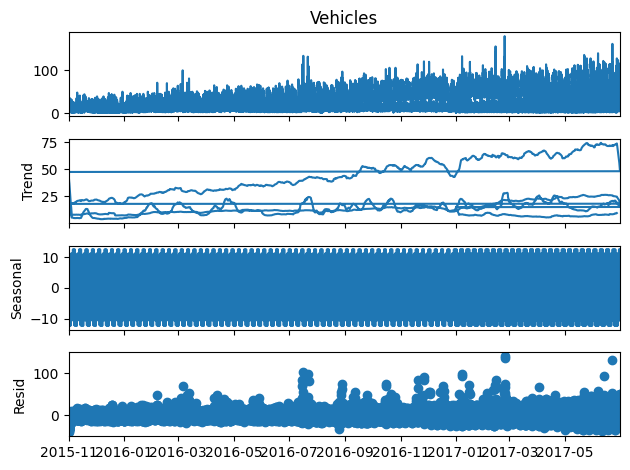

<Figure size 3000x800 with 0 Axes>

In [91]:
dec = seasonal_decompose(df['Vehicles'],period =24*7).plot()
plt.figure(figsize=(30,8))
plt.show()

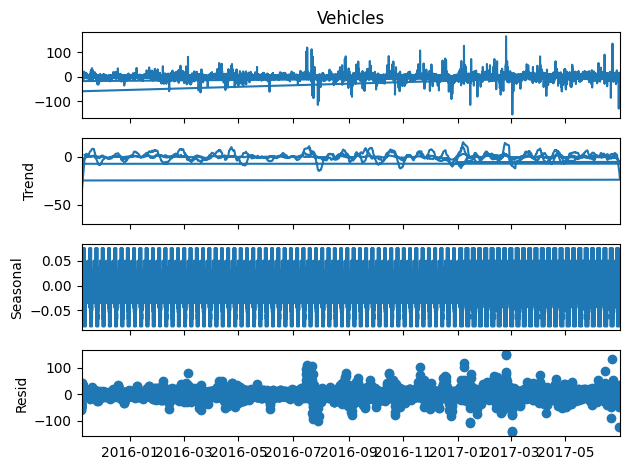

In [92]:
data_diff_seas = df['Vehicles'] - df['Vehicles'].shift(168)
data_diff_seas = data_diff_seas.dropna()

dec =seasonal_decompose(data_diff_seas, period=168).plot()


In [95]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df['Vehicles'])
print(result[0])
print(result[1])

-7.518278111935714
3.851060199915712e-11


In [96]:
#It is already Stationary Data as found out by augmented dicky fuller test

<Axes: xlabel='DateTime', ylabel='Vehicles'>

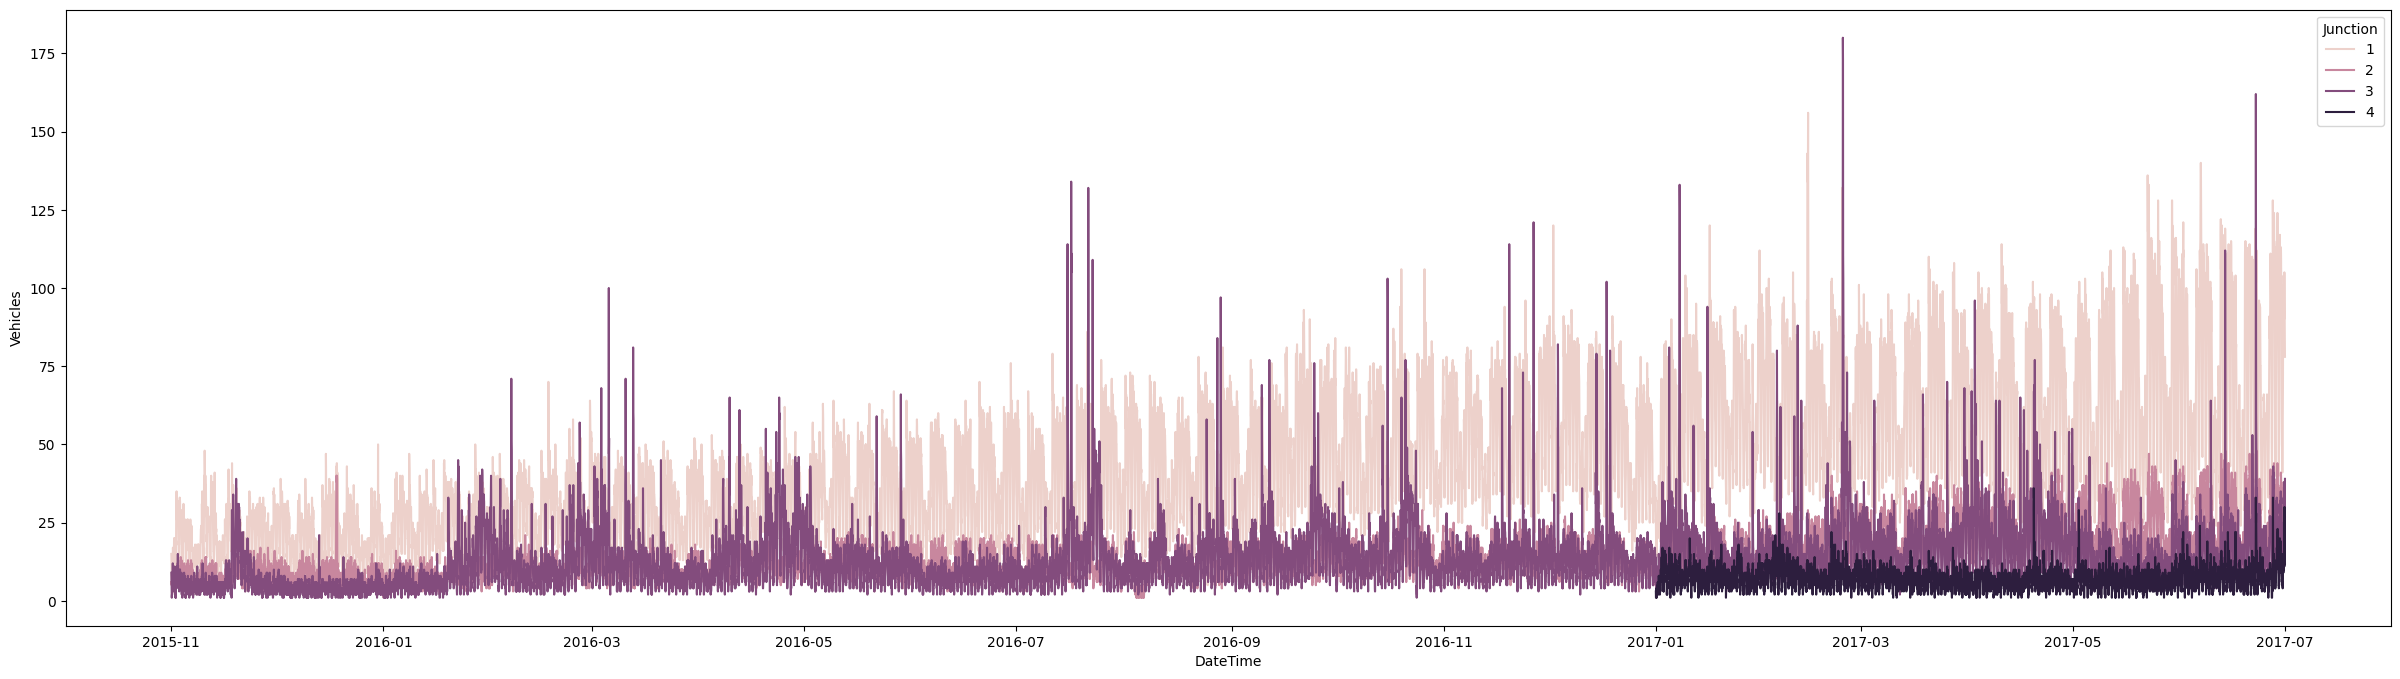

In [97]:
plt.figure(figsize=(30,8))
sns.lineplot(data=df,x=df.index,y='Vehicles',hue='Junction')

Text(0.5, 0, 'Date')

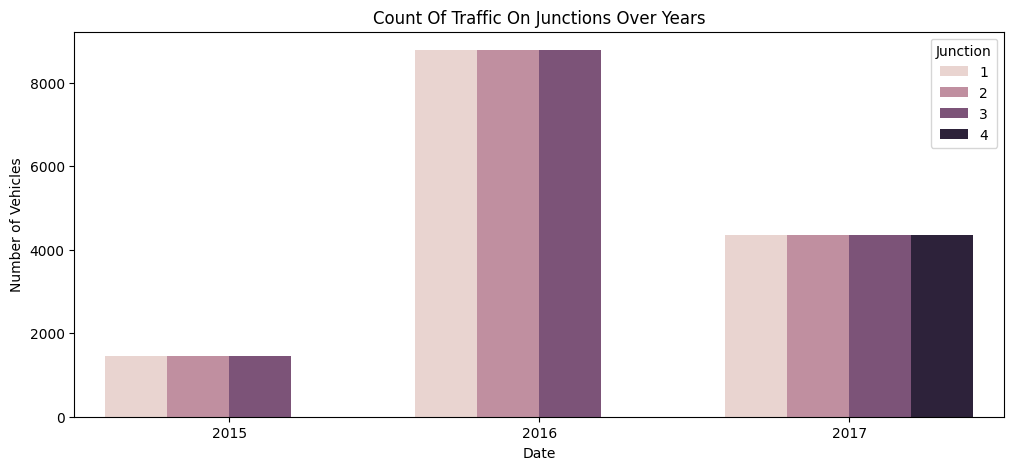

In [98]:
plt.figure(figsize=(12,5))
count = sns.countplot(data=df, x =df["Year"], hue="Junction")
count.set_title("Count Of Traffic On Junctions Over Years")
count.set_ylabel("Number of Vehicles")
count.set_xlabel("Date")

In [99]:
df

,Junction,Vehicles,Year,Month,Date_no,Hour,Day
DateTime,,,,,,,
2015-11-01 00:00:00,1,15,2015,11,1,0,7
2015-11-01 01:00:00,1,13,2015,11,1,1,7
2015-11-01 02:00:00,1,10,2015,11,1,2,7
2015-11-01 03:00:00,1,7,2015,11,1,3,7
2015-11-01 04:00:00,1,9,2015,11,1,4,7
...,...,...,...,...,...,...,...
2017-06-30 19:00:00,4,11,2017,6,30,19,5
2017-06-30 20:00:00,4,30,2017,6,30,20,5
2017-06-30 21:00:00,4,16,2017,6,30,21,5


In [100]:
#Normalizing the Vehicles column
mean = np.mean(df['Vehicles'])
std = np.std(df['Vehicles'])
df['Vehicles'] = (df['Vehicles'] - mean ) / std

In [101]:
df

,Junction,Vehicles,Year,Month,Date_no,Hour,Day
DateTime,,,,,,,
2015-11-01 00:00:00,1,-0.375489,2015,11,1,0,7
2015-11-01 01:00:00,1,-0.471875,2015,11,1,1,7
2015-11-01 02:00:00,1,-0.616454,2015,11,1,2,7
2015-11-01 03:00:00,1,-0.761034,2015,11,1,3,7
2015-11-01 04:00:00,1,-0.664648,2015,11,1,4,7
...,...,...,...,...,...,...,...
2017-06-30 19:00:00,4,-0.568261,2017,6,30,19,5
2017-06-30 20:00:00,4,0.347408,2017,6,30,20,5
2017-06-30 21:00:00,4,-0.327296,2017,6,30,21,5


In [102]:
#Creating intervals for X and y for different timestamps 24,168, etc.
def intervals(data, time_steps=1):
    sequences, labels = [], []
    for i in range(len(data) - time_steps):
        sequences.append(data.iloc[i:(i + time_steps)].values)
        labels.append(data.iloc[i + time_steps]['Vehicles'])
    return np.array(sequences), np.array(labels)

In [112]:
time_steps = 24 #We can take 168 also to check if it varies in a weekly basis or not
X, y = intervals(df, time_steps)

In [113]:
X_train=X[0:40000]
y_train=y[0:40000]
X_val=X[40000:45000]
y_val=y[40000:45000]
X_test=X[45000:]
y_test=y[45000:]

In [114]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((40000, 24, 7), (40000,), (5000, 24, 7), (5000,), (3096, 24, 7), (3096,))

In [115]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(LSTM(256,input_shape=(X_train.shape[1], X_train.shape[2])))
model1.add(Dropout(0.2))
model1.add(Dense(16, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(1))

model1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 256)               270336    
                                                                 
 dropout_16 (Dropout)        (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 16)                4112      
                                                                 
 dropout_17 (Dropout)        (None, 16)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 274465 (1.05 MB)
Trainable params: 274465 (1.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [116]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [118]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, callbacks=[cp1])

Epoch 1/15
1250/1250 [==============================] - 114s 91ms/step - loss: 0.8706 - root_mean_squared_error: 0.9331 - val_loss: 0.2157 - val_root_mean_squared_error: 0.4645
Epoch 2/15
1250/1250 [==============================] - 107s 86ms/step - loss: 0.3211 - root_mean_squared_error: 0.5667 - val_loss: 0.1544 - val_root_mean_squared_error: 0.3930
Epoch 3/15
1250/1250 [==============================] - 105s 84ms/step - loss: 0.2422 - root_mean_squared_error: 0.4922 - val_loss: 0.1877 - val_root_mean_squared_error: 0.4332
Epoch 4/15
1250/1250 [==============================] - 103s 83ms/step - loss: 0.2132 - root_mean_squared_error: 0.4618 - val_loss: 0.1546 - val_root_mean_squared_error: 0.3932
Epoch 5/15
1250/1250 [==============================] - 105s 84ms/step - loss: 0.1912 - root_mean_squared_error: 0.4372 - val_loss: 0.1652 - val_root_mean_squared_error: 0.4064
Epoch 6/15
1250/1250 [==============================] - 111s 89ms/step - loss: 0.1755 - root_mean_squared_error: 0.

In [119]:
loss = model1.evaluate(X_test, y_test)
print(f'Test Loss: {loss*100}%')

97/97 [==============================] - 2s 21ms/step - loss: 0.0167 - root_mean_squared_error: 0.1294
Test Loss: [0.016738198697566986, 0.12937618792057037, 0.016738198697566986, 0.12937618792057037, 0.016738198697566986, 0.12937618792057037, 0.016738198697566986, 0.12937618792057037, 0.016738198697566986, 0.12937618792057037, 0.016738198697566986, 0.12937618792057037, 0.016738198697566986, 0.12937618792057037, 0.016738198697566986, 0.12937618792057037, 0.016738198697566986, 0.12937618792057037, 0.016738198697566986, 0.12937618792057037, 0.016738198697566986, 0.12937618792057037, 0.016738198697566986, 0.12937618792057037, 0.016738198697566986, 0.12937618792057037, 0.016738198697566986, 0.12937618792057037, 0.016738198697566986, 0.12937618792057037, 0.016738198697566986, 0.12937618792057037, 0.016738198697566986, 0.12937618792057037, 0.016738198697566986, 0.12937618792057037, 0.016738198697566986, 0.12937618792057037, 0.016738198697566986, 0.12937618792057037, 0.016738198697566986, 0.1

In [120]:
y_pred = model1.predict(X_test)

97/97 [==============================] - 3s 28ms/step


In [121]:
#Inversing the predictions from normal distributed data
y_test_inv = (y_test * std) + mean
y_pred_inv = (y_pred * std) + mean

In [122]:
from sklearn.metrics import mean_squared_error

In [123]:
mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f'Test - Mean Squared Error: {mse}')

Test - Mean Squared Error: 7.2067340226818155


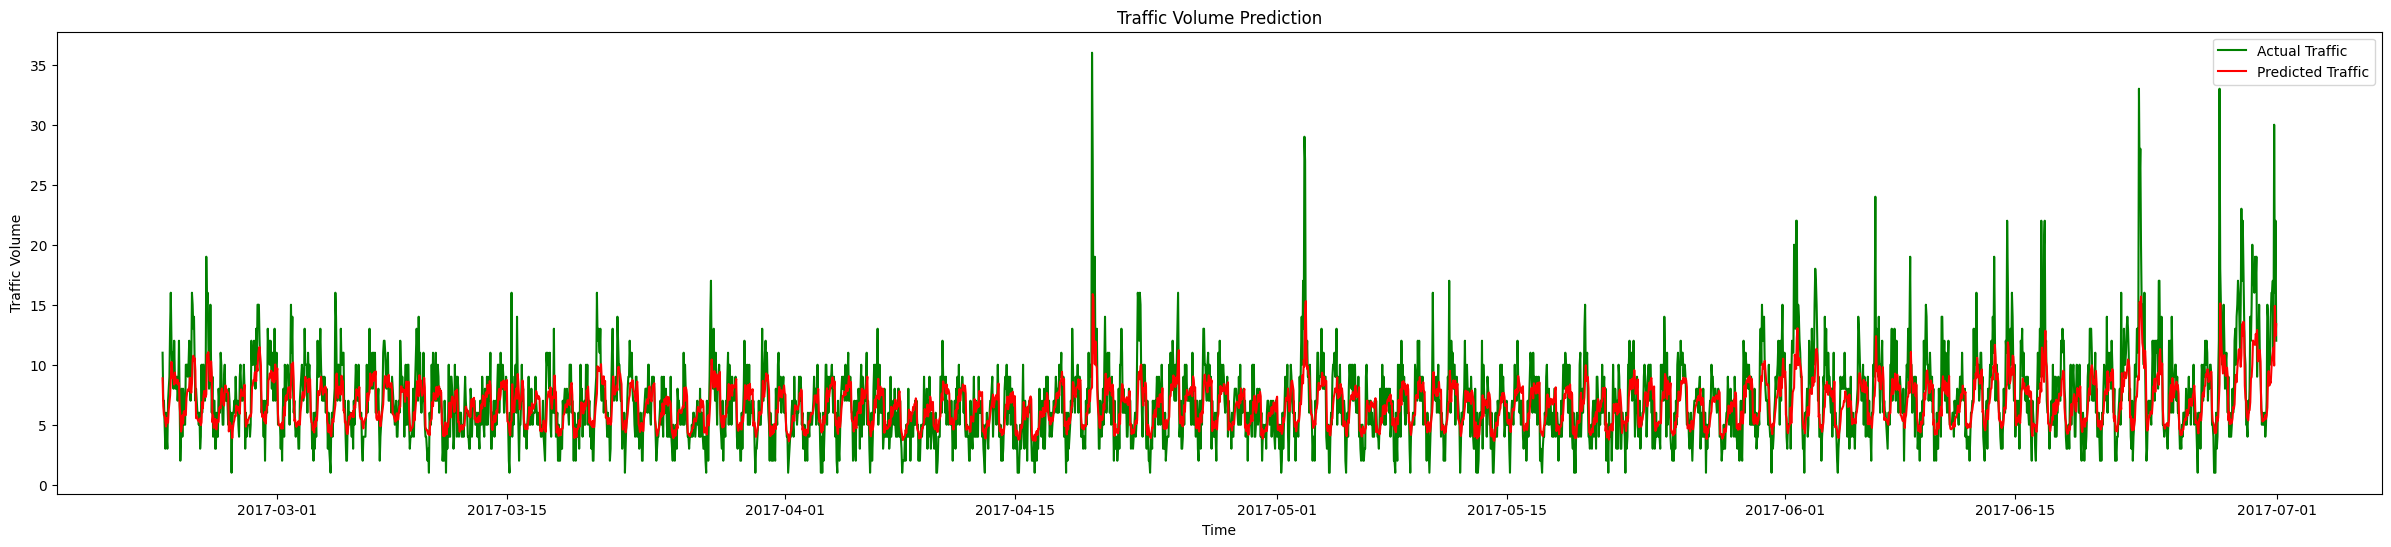

In [132]:
#Final Plotting
plt.figure(figsize=(30, 6))
plt.plot(df.index[-len(y_test):], y_test_inv, color='green', label='Actual Traffic')
plt.plot(df.index[-len(y_test):], y_pred_inv, color='red', label='Predicted Traffic')
plt.title('Traffic Volume Prediction')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

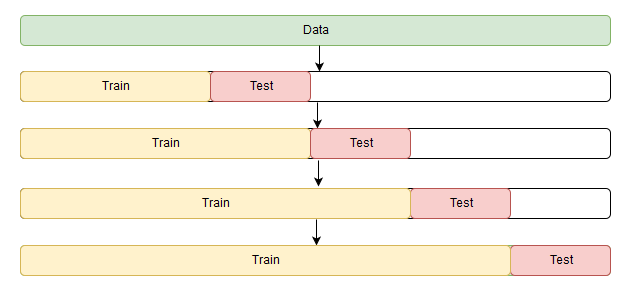

In [ ]:
# MANUAL CROSS VALIDATION FOR TIME SERIES DATA

# X_train1, y_train1 = X[:10000], y[:10000]
# X_val1, y_val1 = X[10000:15000], y[10000:15000]

# X_train2, y_train2 = X[:15000], y[:15000]
# X_val2, y_val2 = X[15000:20000], y[15000:20000]

# X_train3, y_train3 = X[:25000], y[:25000]
# X_val3, y_val3 = X[25000:30000], y[25000:30000]

# X_train4, y_train4 = X[:35000], y[:35000]
# X_val4, y_val4 = X[35000:40000], y[35000:40000]

# X_train5, y_train5 = X[:45000], y[:45000]
# X_val5, y_val5 = X[45000:47000], y[45000:47000]

# X_test1, y_test1 = X[47000:], y[47000:]
# X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape,X_train2.shape, y_train2.shape, X_val2.shape, y_val2.shape,

In [94]:
# model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp1])
# model1.fit(X_train2, y_train2, validation_data=(X_val2, y_val2), epochs=10, callbacks=[cp1])
# model1.fit(X_train3, y_train3, validation_data=(X_val3, y_val3), epochs=10, callbacks=[cp1])
# model1.fit(X_train4, y_train4, validation_data=(X_val4, y_val4), epochs=10, callbacks=[cp1])
# model1.fit(X_train5, y_train5, validation_data=(X_val5, y_val5), epochs=10, callbacks=[cp1])

In [ ]:
# loss = model1.evaluate(X_test1, y_test1)
# print(f'Test Loss: {loss*100}%')
# y_pred = model1.predict(X_test)
# y_test_inv = (y_test * std) + mean
# y_pred_inv = (y_pred * std) + mean
# mse = mean_squared_error(y_test_inv, y_pred_inv)
# print(f'Test - Mean Squared Error: {mse}')
# plt.figure(figsize=(30, 6))
# plt.plot(df.index[-len(y_test):], y_test_inv, color='green', label='Actual Traffic')
# plt.plot(df.index[-len(y_test):], y_pred_inv, color='red', label='Predicted Traffic')
# plt.title('Traffic Volume Prediction')
# plt.xlabel('Time')
# plt.ylabel('Traffic Volume')
# plt.legend()
# plt.show()